In [224]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [225]:
#Load the datasets
movies_data= pd.read_csv('movies.dat',sep='::' , names = ['MovieID','Title','Genres'])
ratings_data = pd.read_csv('ratings.dat',sep='::',names = ['UserID','MovieID','Rating','Timestamp'])
users_data = pd.read_csv('users.dat',sep='::',names=['UserID','Gender','Age','Occupation','Zip-code'])

C:\Users\Rohit\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\Rohit\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Rohit\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different fro

File name: ratings.dat
UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings

File name: users.dat
Data format: UserID::Gender::Age::Occupation::Zip-code

- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"
    
- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"


File name: movies.dat
Data format: MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including
year of release)
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western


In [226]:
print(movies_data.shape)
print(ratings_data.shape)
print(users_data.shape)

(3883, 3)
(1000209, 4)
(6040, 5)


In [227]:
movies_data.columns

Index(['MovieID', 'Title', 'Genres'], dtype='object')

In [228]:
ratings_data.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype='object')

In [229]:
users_data.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], dtype='object')

In [230]:
movies_data.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [231]:
ratings_data.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [232]:
users_data.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [233]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
MovieID    3883 non-null int64
Title      3883 non-null object
Genres     3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [234]:
movies_data.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [235]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
UserID       1000209 non-null int64
MovieID      1000209 non-null int64
Rating       1000209 non-null int64
Timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [236]:
ratings_data.describe()

,UserID,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [237]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null int64
Gender        6040 non-null object
Age           6040 non-null int64
Occupation    6040 non-null int64
Zip-code      6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


In [238]:
users_data.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [239]:
users_data['Age'].value_counts()

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: Age, dtype: int64

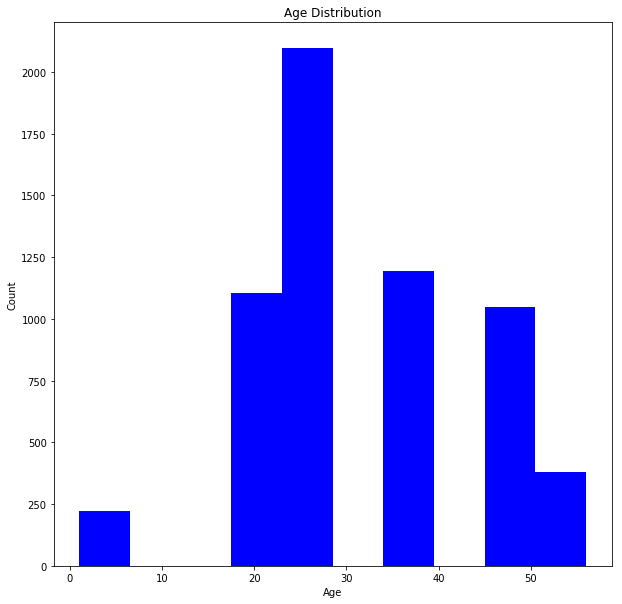

In [240]:
plt.figure(figsize=(10,10))
plt.hist(users_data['Age'],color='b')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

In [241]:
#Merge all the data
All_Data = pd.merge(pd.merge(movies_data,ratings_data, on='MovieID'), users_data, on='UserID')

In [242]:
All_Data.shape

(1000209, 10)

In [243]:
All_Data.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code'],
      dtype='object')

In [244]:
All_Data.groupby('Rating').UserID.count()

Rating
1     56174
2    107557
3    261197
4    348971
5    226310
Name: UserID, dtype: int64

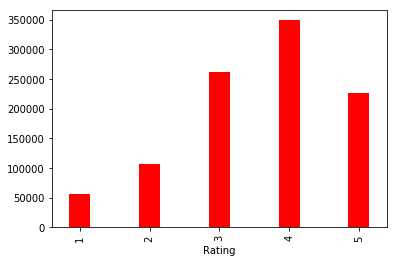

In [245]:
All_Data.groupby('Rating').UserID.count().plot(kind='bar',color='r',width=0.3)

In [246]:
All_Data.groupby('Title').agg({'Rating':['min','max','count','mean']})

Rating                    
                                                  min max count      mean
Title                                                                    
$1,000,000 Duck (1971)                              1   5    37  3.027027
'Night Mother (1986)                                1   5    70  3.371429
'Til There Was You (1997)                           1   5    52  2.692308
'burbs, The (1989)                                  1   5   303  2.910891
...And Justice for All (1979)                       1   5   199  3.713568
1-900 (1994)                                        2   3     2  2.500000
10 Things I Hate About You (1999)                   1   5   700  3.422857
101 Dalmatians (1961)                               1   5   565  3.596460
101 Dalmatians (1996)                               1   5   364  3.046703
12 Angry Men (1957)                                 1   5   616  4.295455
13th Warrior, The (1999)                            1   5   750  3.158667
187 (1997)                                          1   5    55  2.745455
2 Days in the Valley (1996)                         1   5   286  3.283217
20 Dates (1998)                                     1   5   139  2.856115
20,000 Leagues Under the Sea (1954)                 1   5   575  3.702609
200 Cigarettes (1999)                               1   5   181  2.883978
2001: A Space Odyssey (1968)                        1   5  1716  4.068765
2010 (1984)                                         1   5   470  3.417021
24 7: Twenty Four Seven (1997)                      3   5     5  4.000000
24-hour Woman (1998)                                1   3     9  1.777778
28 Days (2000)                                      1   5   505  3.065347
3 Ninjas: High Noon On Mega Mountain (1998)         1   4    47  1.361702
3 Strikes (2000)                                    1   4     4  2.750000
301, 302 (1995)                                     2   4     9  2.888889
39 Steps, The (1935)                                1   5   253  4.075099
400 Blows, The (Les Quatre cents coups) (1959)      1   5   187  4.320856
42 Up (1998)                                        1   5    88  4.227273
52 Pick-Up (1986)                                   1   5   140  3.300000
54 (1998)                                           1   5   259  2.764479
7th Voyage of Sinbad, The (1958)                    1   5   258  3.616279
...                                               ...  ..   ...       ...
Wrongfully Accused (1998)                           1   5   123  2.552846
Wyatt Earp (1994)                                   1   5   270  3.266667
X-Files: Fight the Future, The (1998)               1   5   996  3.492972
X-Men (2000)                                        1   5  1511  3.820649
X: The Unknown (1956)                               1   4    12  2.833333
Xiu Xiu: The Sent-Down Girl (Tian yu) (1998)        1   5    69  3.652174
Yankee Zulu (1994)                                  3   3     2  3.000000
Yards, The (1999)                                   1   5    77  3.220779
Year My Voice Broke, The (1987)                     2   5    27  3.814815
Year of Living Dangerously (1982)                   1   5   391  3.895141
Year of the Horse (1997)                            2   5     4  3.250000
Yellow Submarine (1968)                             1   5   399  3.696742
Yojimbo (1961)                                      1   5   215  4.404651
You Can't Take It With You (1938)                   1   5    77  4.012987
You So Crazy (1994)                                 1   5    13  2.615385
You've Got Mail (1998)                              1   5   838  3.380668
Young Doctors in Love (1982)                        1   5    79  2.607595
Young Frankenstein (1974)                           1   5  1193  4.250629
Young Guns (1988)                                   1   5   562  3.418149
Young Guns II (1990)                                1   5   369  2.907859
Young Poisoner's Handbook, The (1995)              

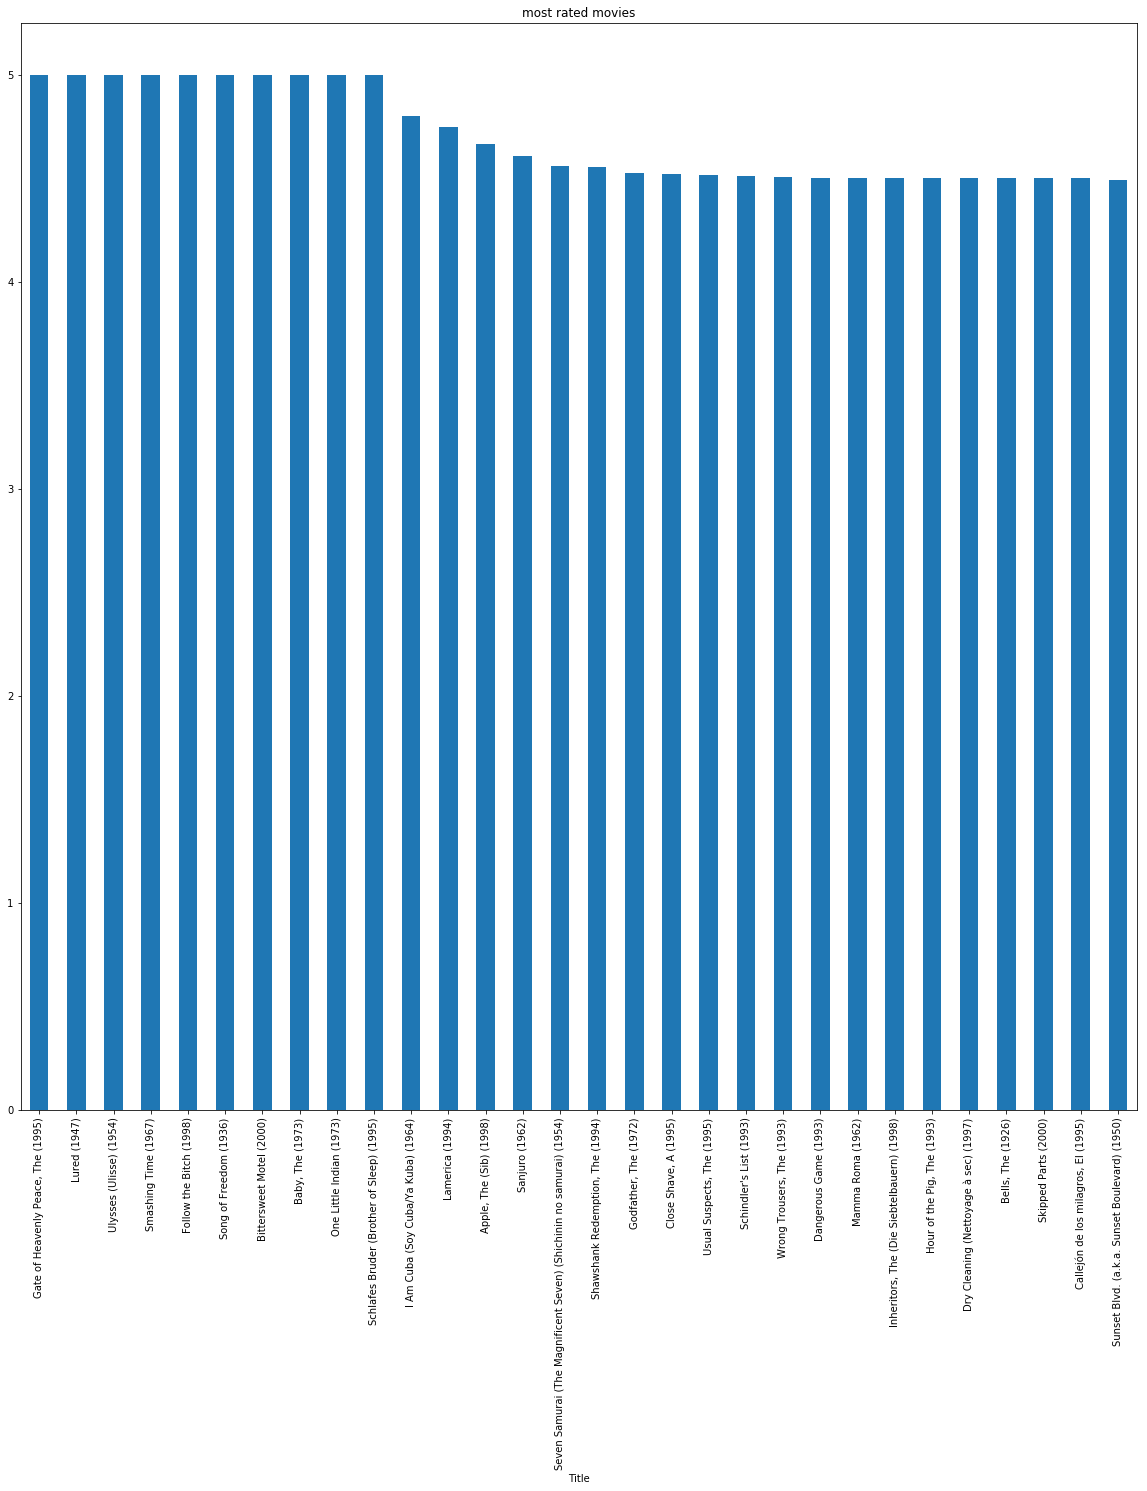

In [247]:
All_Data.groupby('Title')['Rating'].mean().sort_values(ascending=False).head(30).plot(kind='bar',figsize=(20,20),title='most rated movies')

In [248]:
All_Data.groupby('Title')['Rating'].mean().sort_values(ascending=False).head(10)

Title
Gate of Heavenly Peace, The (1995)           5.0
Lured (1947)                                 5.0
Ulysses (Ulisse) (1954)                      5.0
Smashing Time (1967)                         5.0
Follow the Bitch (1998)                      5.0
Song of Freedom (1936)                       5.0
Bittersweet Motel (2000)                     5.0
Baby, The (1973)                             5.0
One Little Indian (1973)                     5.0
Schlafes Bruder (Brother of Sleep) (1995)    5.0
Name: Rating, dtype: float64

In [249]:
All_Data_title_count = All_Data.groupby('Title').size().reset_index(name='Title_grouped_count')

In [250]:
All_Data_title_count.head()

,Title,Title_grouped_count
0,"$1,000,000 Duck (1971)",37
1,'Night Mother (1986),70
2,'Til There Was You (1997),52
3,"'burbs, The (1989)",303
4,...And Justice for All (1979),199


In [251]:
All_Data_title_count.Title_grouped_count.unique().shape

(924,)

In [252]:
All_Data_title_count.shape

(3706, 2)

In [253]:
All_Data_title_count.describe()

,Title_grouped_count
count,3706.000000
mean,269.889099
std,384.047838
min,1.000000
25%,33.000000
50%,123.500000
75%,350.000000
max,3428.000000


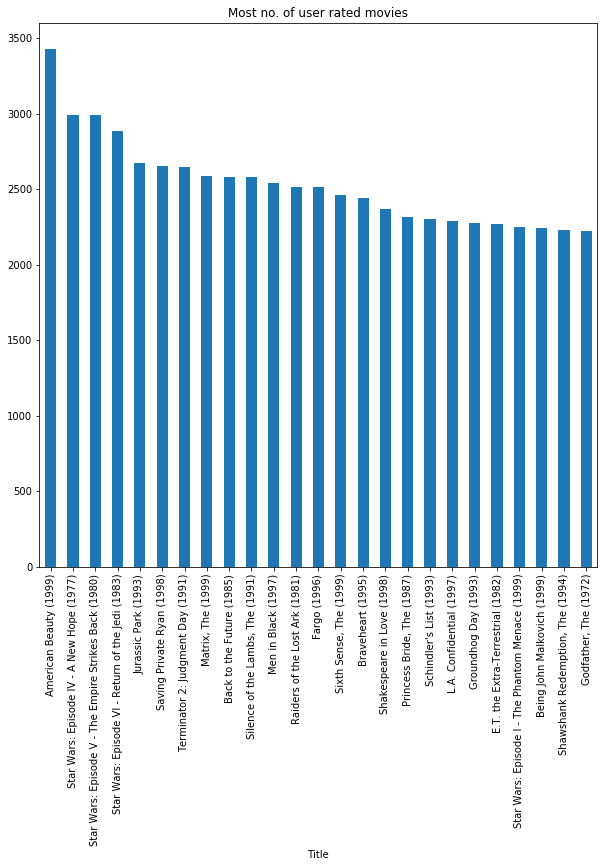

In [254]:
All_Data.groupby('Title').size().nlargest(25).plot(kind='bar',figsize=(10,10),title='Most no. of user rated movies')

In [255]:
All_Data = pd.merge(All_Data, All_Data_title_count, on='Title')

In [256]:
All_Data.shape

(1000209, 11)

In [257]:
All_Data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title_grouped_count
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,2077
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117,2077
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413,2077
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614,2077
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370,2077


In [258]:
All_Data.groupby('Title')['Rating'].mean().sort_values(ascending=False).head(10)

Title
Gate of Heavenly Peace, The (1995)           5.0
Lured (1947)                                 5.0
Ulysses (Ulisse) (1954)                      5.0
Smashing Time (1967)                         5.0
Follow the Bitch (1998)                      5.0
Song of Freedom (1936)                       5.0
Bittersweet Motel (2000)                     5.0
Baby, The (1973)                             5.0
One Little Indian (1973)                     5.0
Schlafes Bruder (Brother of Sleep) (1995)    5.0
Name: Rating, dtype: float64

In [259]:
All_Data[All_Data.Title_grouped_count > 33].groupby('Title')['Rating'].mean().sort_values(ascending=False).head(10)

Title
Sanjuro (1962)                                                         4.608696
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.560510
Shawshank Redemption, The (1994)                                       4.554558
Godfather, The (1972)                                                  4.524966
Close Shave, A (1995)                                                  4.520548
Usual Suspects, The (1995)                                             4.517106
Schindler's List (1993)                                                4.510417
Wrong Trousers, The (1993)                                             4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                          4.491489
Raiders of the Lost Ark (1981)                                         4.477725
Name: Rating, dtype: float64

In [260]:
All_Data[All_Data.Title_grouped_count > 123].groupby('Title')['Rating'].mean().sort_values(ascending=False).head(10)

Title
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.560510
Shawshank Redemption, The (1994)                                       4.554558
Godfather, The (1972)                                                  4.524966
Close Shave, A (1995)                                                  4.520548
Usual Suspects, The (1995)                                             4.517106
Schindler's List (1993)                                                4.510417
Wrong Trousers, The (1993)                                             4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                          4.491489
Raiders of the Lost Ark (1981)                                         4.477725
Rear Window (1954)                                                     4.476190
Name: Rating, dtype: float64

In [261]:
All_Data[All_Data.Title_grouped_count > 350].groupby('Title')['Rating'].mean().sort_values(ascending=False).head(10)

Title
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.560510
Shawshank Redemption, The (1994)                                       4.554558
Godfather, The (1972)                                                  4.524966
Close Shave, A (1995)                                                  4.520548
Usual Suspects, The (1995)                                             4.517106
Schindler's List (1993)                                                4.510417
Wrong Trousers, The (1993)                                             4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                          4.491489
Raiders of the Lost Ark (1981)                                         4.477725
Rear Window (1954)                                                     4.476190
Name: Rating, dtype: float64

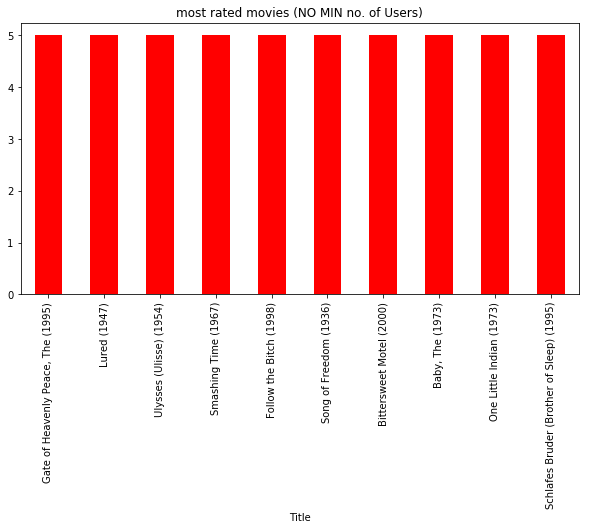

In [262]:
All_Data.groupby('Title')['Rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='r',figsize=(10,5),title='most rated movies (NO MIN no. of Users)')

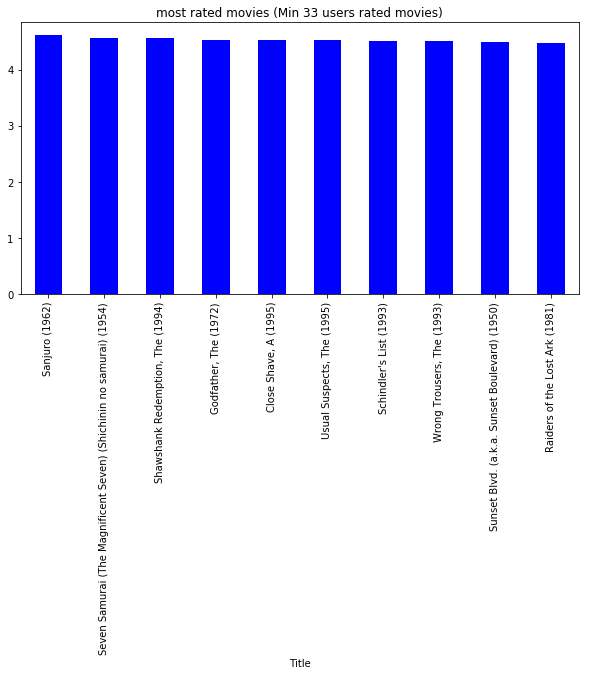

In [263]:
All_Data[All_Data.Title_grouped_count > 33].groupby('Title')['Rating'].mean()\
.sort_values(ascending=False).head(10).plot(kind='bar', color='b',figsize=(10,5),
                                            title='most rated movies (Min 33 users rated movies)')

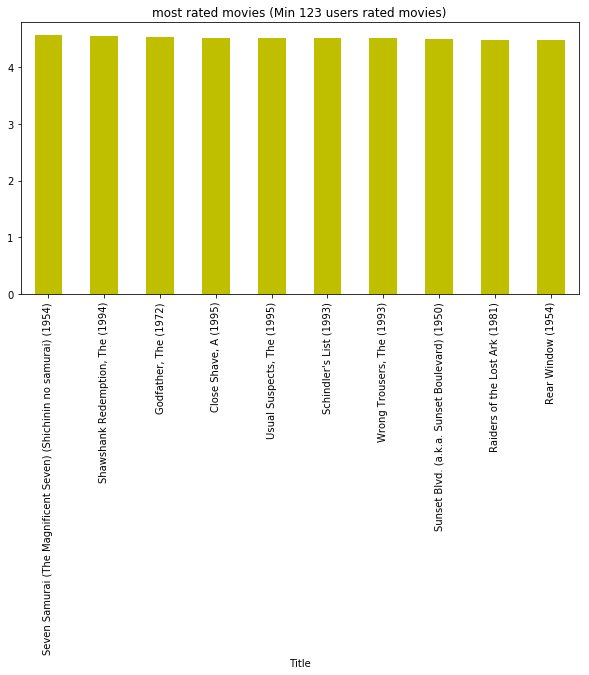

In [264]:
All_Data[All_Data.Title_grouped_count > 123].groupby('Title')['Rating'].mean()\
.sort_values(ascending=False).head(10).plot(kind='bar', color='y',figsize=(10,5),
                                            title='most rated movies (Min 123 users rated movies)')

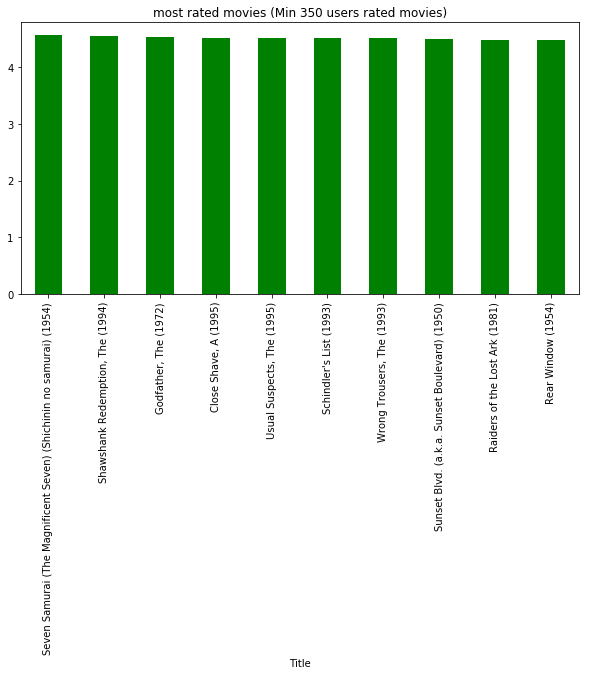

In [265]:
All_Data[All_Data.Title_grouped_count > 350].groupby('Title')['Rating'].mean()\
.sort_values(ascending=False).head(10).plot(kind='bar', color='g',figsize=(10,5),
                                            title='most rated movies (Min 350 users rated movies)')

In [266]:
All_Data[All_Data.Title == 'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)'].shape

(628, 11)

In [267]:
All_Data[All_Data.Title == 'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)']['Rating'].value_counts()

5    425
4    149
3     39
2     11
1      4
Name: Rating, dtype: int64

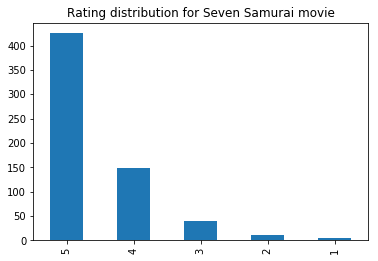

In [268]:
All_Data[All_Data.Title == 'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)']['Rating']\
.value_counts().plot(kind='bar',title='Rating distribution for Seven Samurai movie')

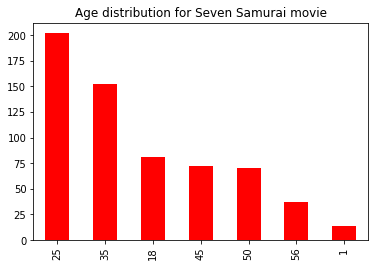

In [269]:
All_Data[All_Data.Title == 'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)']['Age']\
.value_counts().plot(kind='bar',color='r',title='Age distribution for Seven Samurai movie')

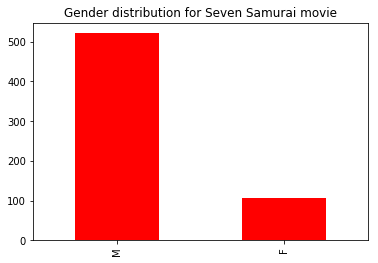

In [270]:
All_Data[All_Data.Title == 'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)']['Gender']\
.value_counts().plot(kind='bar',color='r',title='Gender distribution for Seven Samurai movie')

In [271]:
All_Data.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Title_grouped_count'],
      dtype='object')

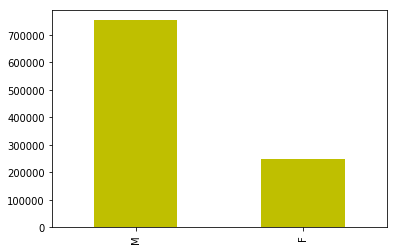

In [272]:
All_Data['Gender'].value_counts().plot(kind='bar',color='y')

In [273]:
All_Data['UserID'].value_counts().nlargest(10)

4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
889     1518
3618    1344
2063    1323
1150    1302
1015    1286
Name: UserID, dtype: int64

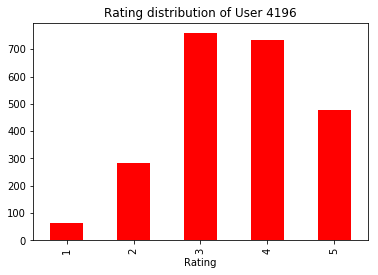

In [274]:
All_Data[All_Data.UserID == 4169].groupby('Rating').size().plot(kind='bar',color='r',title='Rating distribution of User 4196')

(array([111540.,  88165.,  93040., 152426.,  89853., 106948., 107465.,
         96917.,  85914.,  67941.]),
 array([1.0000e+00, 3.9610e+02, 7.9120e+02, 1.1863e+03, 1.5814e+03,
        1.9765e+03, 2.3716e+03, 2.7667e+03, 3.1618e+03, 3.5569e+03,
        3.9520e+03]),
 <a list of 10 Patch objects>)

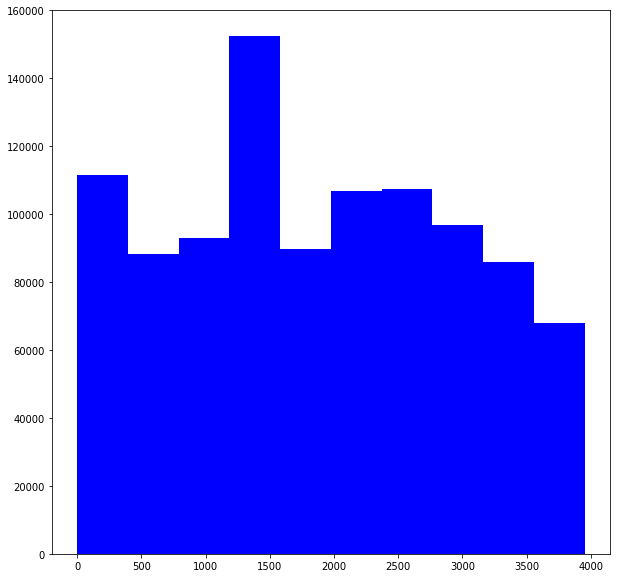

In [275]:
plt.figure(figsize=(10,10))
plt.hist(All_Data['MovieID'],color='b')

(array([ 27211.,      0.,      0., 183536., 395556.,      0., 199003.,
             0., 156123.,  38780.]),
 array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]),
 <a list of 10 Patch objects>)

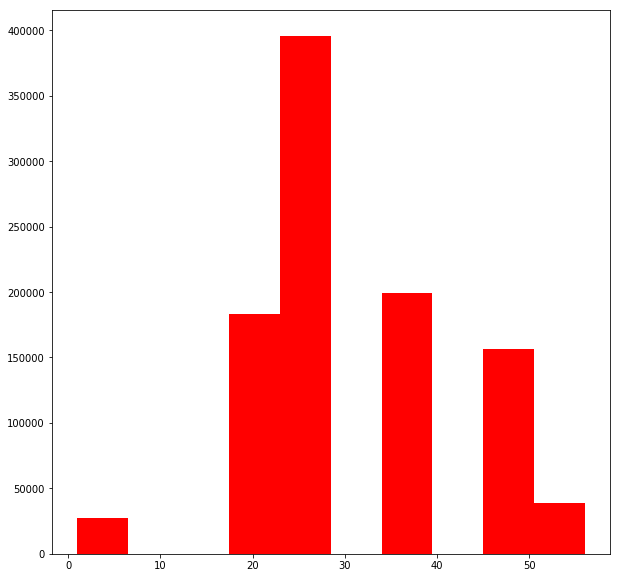

In [276]:
plt.figure(figsize=(10,10))
plt.hist(All_Data['Age'],color='r')

(array([215850.,  81691., 152882., 142630.,  14051.,  43853.,  70968.,
         72060., 118837.,  87387.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

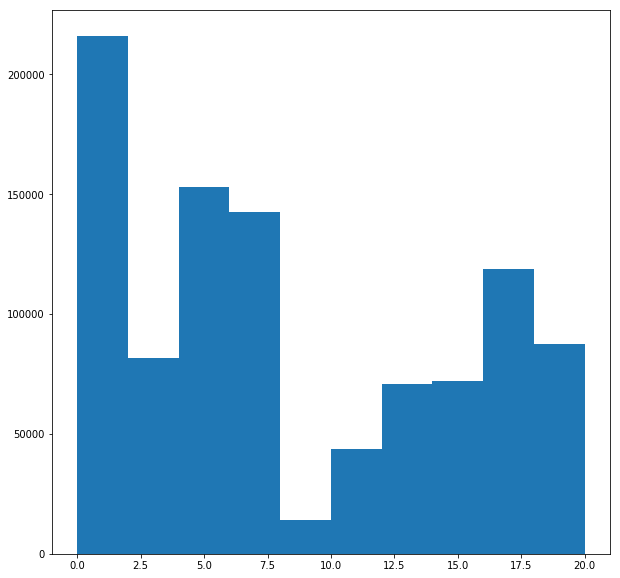

In [277]:
plt.figure(figsize=(10,10))
plt.hist(All_Data['Occupation'])